In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.corpus import wordnet as wn

import gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary

import re
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

import unicodedata
from textblob import Word

In [2]:
three_mask = pd.read_csv('master/master_policy3.csv')

In [3]:
three_mask.head()

,platform,post_id,username,text
0,instagram,B--cvRQHJRp,photographyholic,singapore now it is mandatory with immediate e...
1,instagram,B-9dOShHqC-,mothershipsg,just in first time offenders will face a s 300...
2,instagram,B_Aeqc0nnVm,mothershipsg,first time offenders will face a fine of below...
3,instagram,B-_uYTVAjLI,sgagsg,hello police please fine this sound by @mingwe...
4,instagram,B_HnKCNHUxp,sgmemetextbook,the 600 the government gave out on 14 4 2x 300...


In [4]:
three_mask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   platform  924 non-null    object
 1   post_id   924 non-null    object
 2   username  924 non-null    object
 3   text      924 non-null    object
dtypes: object(4)
memory usage: 29.0+ KB


In [5]:
mask =list(three_mask['text'].dropna())

In [6]:
mask

['singapore now it is mandatory with immediate effect for everyone to wear a mask when they step out of your house as part of stricter measures to curb the further spread of the coronavirus those who do not risk a 300 fine for first time offenders there are exemptions for those engaging in strenuous exercise and children below the age of two as medical experts recommend against them wearing masks national development minister lawrence wong said at a media conference on tuesday april 14 please stay home sgunited covi d19 singaporetogether sgunited singapore singapore2020 photographyislife streetshared instagram artofvisuals exploresg instasg visualambassadors whatissingapore iluvsg citygrammers kilogrammerz madaboutsingapore2020 streetphotography streetshated thankyou singapore singapore2020 madaboutsingapore2020c circuitbreakersg',
 'just in first time offenders will face a s 300 fine photo via suhaimi abdullah getty images link in bio',
 'first time offenders will face a fine of below

In [7]:
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}
sorted_cList={}
for k in sorted(cList, key=len, reverse=True):
    sorted_cList[k] = cList[k]
c_re = re.compile('(%s)' % '|'.join(sorted_cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)

def remove_urls (s):
    s = re.sub(r"(?i)\b((?:[a-z][\w-]+:(?:/{1,3}|[a-z0-9%])|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\.,<>?«»“”‘’]))", '', s, flags=re.M)
    return(s)

In [8]:
contractions = [i for i in cList.keys()]

In [9]:
def correct_spelling(text,keep): #string, list of words to not change
    temp = []
    for word in text.split(' '):
        if (0.985 <= Word(word).spellcheck()[0][1] < 1.0) and word not in keep:
            w = Word(word).spellcheck()[0][0]
            temp.append(w)
        else:
            temp.append(word)
            
    return " ".join(temp)

In [10]:
wnl = nltk.stem.wordnet.WordNetLemmatizer()
wtk = nltk.tokenize.RegexpTokenizer(r'\w+')

def preprocess(listtexts,keep):
    stop_list = stopwords.words('english') + [i for i in string.punctuation] + contractions
#     l1 = []
#     l2 = []
    processed_texts = []
    tokens = []
    tokenised_form = []
    
    for text in listtexts:
        text = str(text)
        text = text.lower()
        text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
        text = remove_urls(text)
        text = expandContractions(text)
        text = correct_spelling(text,keep)
        
        tokens = wtk.tokenize(text)
        tokens = [token for token in tokens if token not in stop_list]
        tokens = [token for token in tokens if len(token) != 1]
        tokens = [wnl.lemmatize(token) for token in tokens]
        tokens = [unicodedata.normalize("NFKD",word) for word in tokens]
#         tokens = [word.encode('ascii','ignore') for word in tokens]
        tokens = [word.encode('ascii','ignore').decode('utf-8') for word in tokens]
        
#         for i in tokens:
#             if i in l1:
#                 x = tokens.index(i)
#                 y = l1.index(i)
#                 tokens.remove(i)
#                 tokens.insert(x,l2[y])
                
        if len(tokens) != 0:
            processed = ' '.join(tokens)
            
            processed_texts.append(processed)
            tokenised_form.append(tokens)
        
    return processed_texts, tokenised_form

In [11]:
stop_list = stopwords.words('english') + [i for i in string.punctuation] + contractions

In [12]:
mask_clean, mask_tok = preprocess(mask,keep=[])

In [38]:
def remove_new_stopwords(list_texts,tokens,new_stop_words):
    temp = []
    temp_tok = []
    
    for i in list_texts:
        x = i.split(' ')
        for n in new_stop_words:
            if n in x:
                x.remove(n)
        temp.append(" ".join(x))
    
    for i in tokens:
        x = i
        for n in new_stop_words:
            if n in x:
                x.remove(n)
        temp_tok.append(x)
      
    return temp, temp_tok

In [39]:
new_stop_words = ['http','www','github','com']

mask_clean2, mask_tok2 = remove_new_stopwords(mask_clean, mask_tok, new_stop_words)

stopwords_list = stop_list + new_stop_words

# Word Frequency

In [29]:
from nltk.probability import FreqDist

In [30]:
def word_freq(tok):
    list_of_words = []
    for i in tok:
        list_of_words += i
        
    fdist = FreqDist(list_of_words)
#     print(fdist.most_common()[:10],'\n')
    common_words = fdist.most_common()[:50]
    print(common_words)
    
    bgs = nltk.bigrams(list_of_words)
    fdist2 = nltk.FreqDist(bgs)
#     print(fdist2.most_common()[:10],'\n')
    common_bigrams = fdist2.most_common()[:20]
    print('\n',common_bigrams)
    
#     tgs = nltk.trigrams(list_of_words)
#     fdist3 = nltk.FreqDist(tgs)
#     print(fdist3.most_common()[:10])
    
    return common_words, common_bigrams

In [31]:
mask_words, mask_bigrams = word_freq(mask_tok)

[('mask', 706), ('wear', 274), ('fine', 184), ('people', 163), ('go', 112), ('wearing', 91), ('like', 88), ('one', 82), ('need', 82), ('time', 78), ('still', 77), ('singapore', 74), ('government', 71), ('also', 71), ('get', 69), ('even', 65), ('home', 63), ('say', 61), ('think', 60), ('virus', 56), ('would', 55), ('know', 51), ('300', 48), ('make', 47), ('said', 46), ('u', 46), ('going', 46), ('without', 46), ('exercise', 45), ('day', 45), ('want', 45), ('really', 45), ('well', 43), ('covid', 43), ('give', 41), ('see', 41), ('http', 41), ('running', 40), ('take', 40), ('thing', 40), ('everyone', 39), ('spread', 39), ('first', 38), ('rule', 38), ('back', 38), ('measure', 36), ('stay', 36), ('dont', 36), ('sg', 35), ('got', 34)]

 [(('wear', 'mask'), 222), (('wearing', 'mask'), 64), (('covid', '19'), 31), (('without', 'mask'), 25), (('reusable', 'mask'), 25), (('stay', 'home'), 23), (('circuit', 'breaker'), 22), (('300', 'fine'), 17), (('safe', 'distancing'), 17), (('fine', '300'), 16), 

In [40]:
mask_words2, mask_bigrams2 = word_freq(mask_tok2)

[('mask', 706), ('wear', 274), ('fine', 184), ('people', 163), ('go', 112), ('wearing', 91), ('like', 88), ('one', 82), ('need', 82), ('time', 78), ('still', 77), ('singapore', 74), ('government', 71), ('also', 71), ('get', 69), ('even', 65), ('home', 63), ('say', 61), ('think', 60), ('virus', 56), ('would', 55), ('know', 51), ('300', 48), ('make', 47), ('said', 46), ('u', 46), ('going', 46), ('without', 46), ('exercise', 45), ('day', 45), ('want', 45), ('really', 45), ('well', 43), ('covid', 43), ('give', 41), ('see', 41), ('running', 40), ('take', 40), ('thing', 40), ('everyone', 39), ('spread', 39), ('first', 38), ('rule', 38), ('back', 38), ('measure', 36), ('stay', 36), ('dont', 36), ('sg', 35), ('got', 34), ('use', 33)]

 [(('wear', 'mask'), 222), (('wearing', 'mask'), 64), (('covid', '19'), 31), (('without', 'mask'), 25), (('reusable', 'mask'), 25), (('stay', 'home'), 23), (('circuit', 'breaker'), 22), (('300', 'fine'), 17), (('safe', 'distancing'), 17), (('fine', '300'), 16), (

# Word Cloud 

In [32]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [50]:
def word_cloud(common_words,type):
    common = ''
    for i in common_words:
        common += i[0] + ' '
        
    wordcloud = WordCloud(background_color="white", width=1600, height=800, max_font_size=200).generate(common)

    plt.imshow(wordcloud, interpolation ='bilinear')
    plt.axis("off")
    plt.show()
    
    wordcloud.to_file("C:/Users/user/Downloads/IS434 (SA)/Project/ProjectCloud/mask_{}.png".format(type))
    
    return None

In [51]:
def word_cloud_bigrams(common_bigrams,type):
    common = ''
    for i in common_bigrams:
        common += "_".join(i[0]) + ' '
        
    wordcloud = WordCloud(background_color="white", width=1600, height=800, max_font_size=200).generate(common)

    plt.imshow(wordcloud, interpolation ='bilinear')
    plt.axis("off")
    plt.show()
    
    wordcloud.to_file("C:/Users/user/Downloads/IS434 (SA)/Project/ProjectCloud/mask_{}.png".format(type))
    
    return None

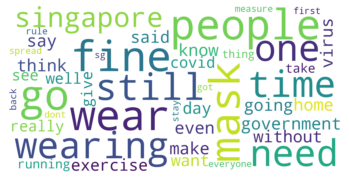

In [55]:
word_cloud(mask_words,"words")

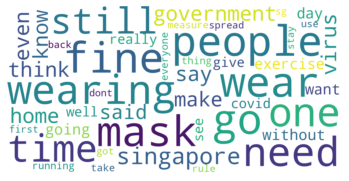

In [56]:
word_cloud(mask_words2,"words2")

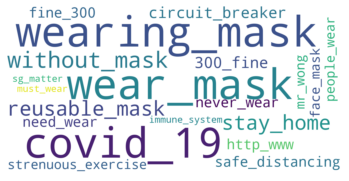

In [57]:
word_cloud_bigrams(mask_bigrams, 'bigrams')

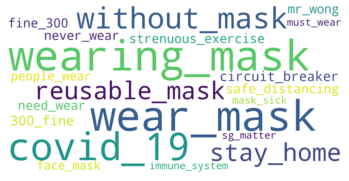

In [58]:
word_cloud_bigrams(mask_bigrams2, 'bigrams2')

# Topic Modelling

In [43]:
## Your code. Create vector object here ##
cv = CountVectorizer()
count_vect = cv.fit_transform(mask_clean2)

In [44]:
vocab = cv.get_feature_names()
print("Number of features :\n", len(vocab))
cv_matrix = count_vect.toarray()
vect_df = pd.DataFrame(cv_matrix, columns=vocab)
vocab_s1 = vect_df.sum(axis = 0)
vocab_sorted = vocab_s1.sort_values(ascending=False)
vocab_sorted.head(25)

Number of features :
 3981


mask          706
wear          274
fine          184
people        163
go            112
wearing        91
like           88
need           82
one            82
time           78
still          77
singapore      74
government     71
also           71
get            69
even           65
home           63
say            61
think          60
virus          56
would          55
know           51
300            48
make           47
without        46
dtype: int64

In [45]:
from nltk.tokenize import word_tokenize

tokenised_pt = [word_tokenize(i) for i in mask_clean2]
# tokenised_pt = tok

In [46]:
dictionary = gensim.corpora.Dictionary(tokenised_pt)
print('Sample word to number mappings:', list(dictionary.items())[:15])
print('Total Vocabulary Size:', len(dictionary))
dictionary.filter_extremes(no_below=3)
corpus_vect = [dictionary.doc2bow(text) for text in tokenised_pt]

Sample word to number mappings: [(0, '14'), (1, '300'), (2, 'age'), (3, 'april'), (4, 'artofvisuals'), (5, 'child'), (6, 'circuitbreakersg'), (7, 'citygrammers'), (8, 'conference'), (9, 'coronavirus'), (10, 'covi'), (11, 'curb'), (12, 'd19'), (13, 'development'), (14, 'effect')]
Total Vocabulary Size: 3987


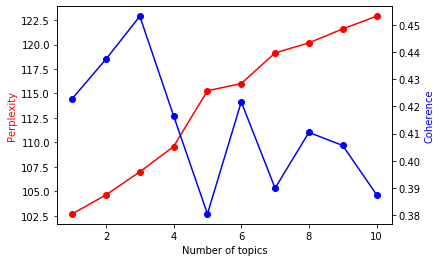

In [47]:
from gensim.models import CoherenceModel

perplexity_list = []
coherence_list = []
num_topics = range(1,11)

for i in num_topics:
    ldamodel = LdaModel(corpus_vect, num_topics = i, id2word=dictionary, passes=50, random_state= 0)
    
    log_perplexity = ldamodel.log_perplexity(corpus_vect)
    perplexity = 2**(-log_perplexity)
    perplexity_list.append(perplexity)
    
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=tokenised_pt, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
#     print(coherence_lda)
    coherence_list.append(coherence_lda)
    

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(num_topics,perplexity_list, marker='o', color =  'r')
ax2.plot(num_topics, coherence_list, marker = 'o', color = 'b')

ax1.set_xlabel('Number of topics')
ax1.set_ylabel('Perplexity', color = 'r')
ax2.set_ylabel('Coherence', color = 'b')

# plt.plot(num_topics, perplexity_list, marker='o')
# plt.xlabel('Number of topics')
# plt.ylabel('Perplexity') 
plt.show()

In [48]:
ldamodel = LdaModel(corpus_vect, num_topics = 3, id2word=dictionary, passes=50, random_state= 0)

In [49]:
#formatting the topics in print
for num ,topic in ldamodel.show_topics(formatted=True, num_topics=3, num_words=10):
    print(str(num)+": "+ topic + "\n\n")

0: 0.014*"wearing" + 0.012*"like" + 0.010*"barber" + 0.009*"home" + 0.008*"one" + 0.008*"face" + 0.008*"safe" + 0.008*"make" + 0.007*"distancing" + 0.007*"still"


1: 0.048*"wear" + 0.034*"fine" + 0.017*"people" + 0.016*"go" + 0.012*"need" + 0.009*"government" + 0.009*"say" + 0.008*"300" + 0.008*"like" + 0.008*"time"


2: 0.013*"people" + 0.010*"virus" + 0.008*"still" + 0.008*"covid" + 0.008*"would" + 0.008*"even" + 0.008*"think" + 0.008*"back" + 0.007*"also" + 0.007*"singapore"


